In [1]:
#cargamos las librerías
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
sns.set_style("whitegrid")

## Carga de Datos

In [2]:
#carganos la data y visualizamos las 5 primeras filas
df = pd.read_csv("https://raw.githubusercontent.com/restevesd/fuentes/main/Bank_Personal_Loan_Modelling-1.csv")
df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [3]:
# Diccionario de traducción de columnas
column_translation = {
    'ID': 'ID',
    'Age': 'Edad',
    'Experience': 'Experiencia',
    'Income': 'Ingresos',
    'ZIP Code': 'Código Postal',
    'Family': 'Familia',
    'CCAvg': 'Gasto Medio en Tarjeta de Crédito',
    'Education': 'Educación',
    'Mortgage': 'Hipoteca',
    'Personal Loan': 'Préstamo Personal',
    'Securities Account': 'Cuenta de Valores',
    'CD Account': 'Cuenta de Certificado de Depósito',
    'Online': 'Servicios Bancarios en Línea',
    'CreditCard': 'Tarjeta de Crédito'
}

## Standard Scaling de Income (Ingresos) y de CCAvg (Gasto Promedio en Tarjeta de Crédito)

In [4]:
"""Realice un escalado estándar en las columnas Income y CCAvg para crear nuevas columnas Income_scaled y CCAvg_scaled. Utilizará estas
dos variables para la segmentación de clientes. Realiza una análisis descriptivo de las columnas procesadas para verificar que el escalado se
ha aplicado correctamente"""
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Income', 'CCAvg']])
df['Income_scaled'] = data_scaled[:, 0]
df['CCAvg_scaled'] = data_scaled[:, 1]
df_scaled = pd.DataFrame(data_scaled, columns=['Income_scaled', 'CCAvg_scaled'])
print(df_scaled.describe())

       Income_scaled  CCAvg_scaled
count   5.000000e+03  5.000000e+03
mean    1.449507e-16 -6.394885e-17
std     1.000100e+00  1.000100e+00
min    -1.428969e+00 -1.108987e+00
25%    -7.554825e-01 -7.084116e-01
50%    -2.123482e-01 -2.506106e-01
75%     5.263146e-01  3.216407e-01
max     3.263712e+00  4.613525e+00


## Clusterización con KMeans con escalado

Se asume que se requieren 3 clusters.

In [5]:
# clusterización especificando 3 clusters y random_state como 42, crear una nueva columna, Cluster, que contenga el cluster predicho por el modelo
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)
prediccion = model.predict(df_scaled)
df_scaled['Cluster'] = prediccion
print(df_scaled['Cluster'].value_counts())

1    2569
2    1793
0     638
Name: Cluster, dtype: int64


/opt/homebrew/Caskroom/miniforge/base/envs/exp/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


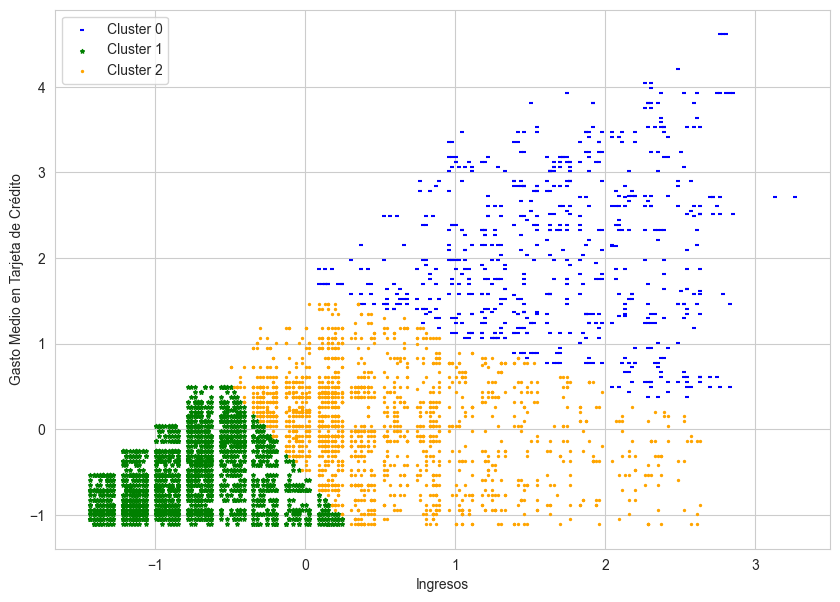

In [6]:
plt.figure(figsize=(10, 7))
# Gráfico de dispersión del cluster con colores y marcas diferenciadores
markers = ['_', '*', '.']
colores = ["blue","green","orange"]
for clust in range(3):
    temp = df_scaled[df_scaled.Cluster == clust]
    plt.scatter(temp.Income_scaled, temp.CCAvg_scaled, marker=markers[clust], c=colores[clust], label="Cluster "+str(clust), s=8)
plt.xlabel(column_translation['Income'])
plt.ylabel(column_translation['CCAvg'])
plt.legend()
plt.show()


## Promedios de Income (Ingresos) y de CCAvg (Gasto Promedio en Tarjeta de Crédito) en cada cluster

             Income     CCAvg
Cluster                      
0        150.390282  5.540345
1         39.135072  0.982417
2         96.142777  2.025165


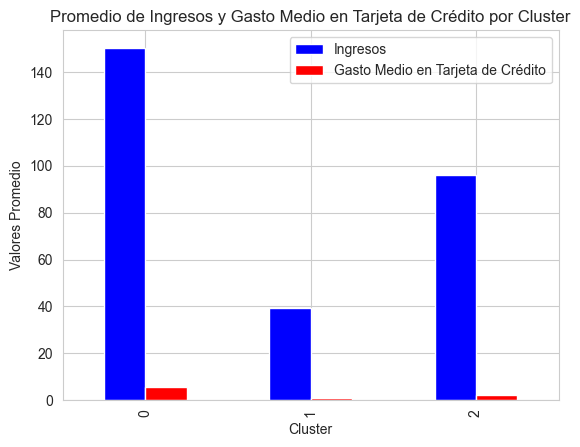

In [7]:

# Imprimir los valores medios de Income y CCAvg para los tres clusters
df['Cluster'] = df_scaled["Cluster"]
print(df.groupby("Cluster")[["Income", "CCAvg"]].mean())
df.groupby("Cluster")[["Income", "CCAvg"]].mean().plot.bar(color=['blue','red'])
plt.xlabel('Cluster')
plt.ylabel('Valores Promedio')
plt.title('Promedio de Ingresos y Gasto Medio en Tarjeta de Crédito por Cluster')
plt.legend([column_translation['Income'], column_translation['CCAvg']])
plt.show()

## Promedios de Income (Ingresos) y de CCAvg (Gasto Promedio en Tarjeta de Crédito) en cada cluster pero escalados

Aunque ambos están en miles de dólares estadounidenses, ingresos se refiere a los ingresos anuales estimados del cliente, mientras que CCAvg es el gasto medio en tarjetas de crédito al mes. Estas diferencias en la escala pueden dificultar la comparación directa y el análisis conjunto de estas características.

Al aplicar StandardScaler, transformamos ambas características para que tengan una media de 0 y una desviación estándar de 1. Esto facilita la comparación y el análisis, ya que ambas características se encontraran en una escala uniforme.

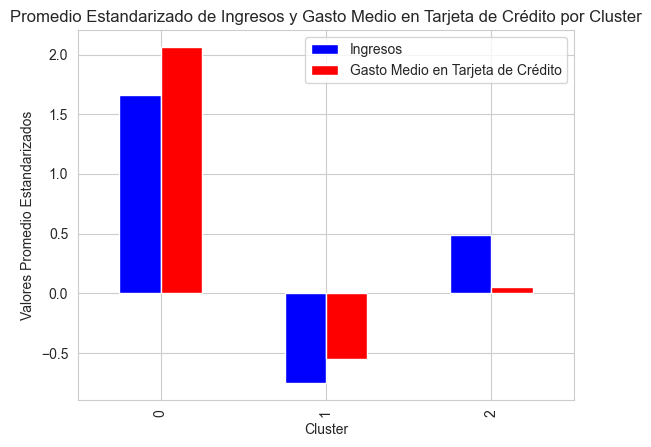

In [8]:
# Comparación visual de los clusters utilizando los valores estandarizados de Income y CCAvg
df.groupby("Cluster")[["Income_scaled", "CCAvg_scaled"]].mean().plot.bar(color=['blue','red'])
plt.xlabel('Cluster')
plt.ylabel('Valores Promedio Estandarizados')
plt.title('Promedio Estandarizado de Ingresos y Gasto Medio en Tarjeta de Crédito por Cluster')
plt.legend([column_translation['Income'], column_translation['CCAvg']])
plt.show()

## Promedios de las otras columnas en cada cluster

In [9]:
# Imprimir los valores medios de los clusters para las características Edad, Hipoteca, Familia, Tarjeta de crédito, Online y Préstamo personal
cluster_means = df.groupby("Cluster")[["Age", "Mortgage", "Family", "CreditCard", "Online", "Personal Loan"]].mean()
print(cluster_means)

               Age   Mortgage    Family  CreditCard    Online  Personal Loan
Cluster                                                                     
0        43.924765  89.537618  2.017241    0.285266  0.605016       0.413793
1        45.797197  42.231218  2.513429    0.294667  0.592448       0.000000
2        45.184049  65.185165  2.363636    0.296152  0.600112       0.120468


## Todos los promedios por cluster

In [10]:
# Crear DataFrame con los nombres de las columnas en español y sus promedios
cluster_means_full = df.groupby("Cluster")[["Age", "Mortgage", "Family", "CreditCard", "Online", "Personal Loan", "Income", "CCAvg"]].mean()

cluster_means_full = cluster_means_full.rename(columns=column_translation)
cluster_means_full = cluster_means_full.reset_index()
cluster_means_long = pd.melt(cluster_means_full, id_vars=["Cluster"], var_name="Característica", value_name="Promedio")

# Crear DataFrames por cada cluster
df_cluster_0 = cluster_means_long[cluster_means_long['Cluster'] == 0]
df_cluster_1 = cluster_means_long[cluster_means_long['Cluster'] == 1]
df_cluster_2 = cluster_means_long[cluster_means_long['Cluster'] == 2]

In [11]:
df_cluster_0

,Cluster,Característica,Promedio
0,0,Edad,43.924765
3,0,Hipoteca,89.537618
6,0,Familia,2.017241
9,0,Tarjeta de Crédito,0.285266
12,0,Servicios Bancarios en Línea,0.605016
15,0,Préstamo Personal,0.413793
18,0,Ingresos,150.390282
21,0,Gasto Medio en Tarjeta de Crédito,5.540345


In [12]:
df_cluster_1

,Cluster,Característica,Promedio
1,1,Edad,45.797197
4,1,Hipoteca,42.231218
7,1,Familia,2.513429
10,1,Tarjeta de Crédito,0.294667
13,1,Servicios Bancarios en Línea,0.592448
16,1,Préstamo Personal,0.000000
19,1,Ingresos,39.135072
22,1,Gasto Medio en Tarjeta de Crédito,0.982417


In [13]:
df_cluster_2

,Cluster,Característica,Promedio
2,2,Edad,45.184049
5,2,Hipoteca,65.185165
8,2,Familia,2.363636
11,2,Tarjeta de Crédito,0.296152
14,2,Servicios Bancarios en Línea,0.600112
17,2,Préstamo Personal,0.120468
20,2,Ingresos,96.142777
23,2,Gasto Medio en Tarjeta de Crédito,2.025165
